In [27]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, Conv2D, Input, GlobalMaxPool2D, MaxPool2D, BatchNormalization
from tensorflow.keras.datasets import cifar10 

In [28]:
# Load the data
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
#flatten the data
y_train, y_test = y_train.flatten(), y_test.flatten()

print("x_train shape:",x_train.shape)
print("y_train.shape:",y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [29]:
# Number of classes
K = len(set(y_train))
print("Classes:",K)

Classes: 10


In [ ]:
# Build the model 
model = Sequential([
                    Input(shape=x_train[0].shape),
                    Conv2D(32, (3,3), strides=2, activation='relu'),
                    Conv2D(64, (3,3), strides=2, activation='relu'),
                    Conv2D(128, (3,3), strides=2, activation='relu'),
                    Flatten(),
                    Dropout(0.2),
                    Dense(1024,activation='relu'),
                    Dropout(0.2),
                    Dense(K,activation='softmax')
              
])

# Compile 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train
r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.4801 - accuracy: 0.4603 - val_loss: 1.2001 - val_accuracy: 0.5629
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1488 - accuracy: 0.5907 - val_loss: 1.0659 - val_accuracy: 0.6181
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9959 - accuracy: 0.6438 - val_loss: 0.9749 - val_accuracy: 0.6512
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8775 - accuracy: 0.6873 - val_loss: 0.9370 - val_accuracy: 0.6722
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7748 - accuracy: 0.7260 - val_loss: 0.9115 - val_accuracy: 0.6831
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6866 - accuracy: 0.7557 - val_loss: 0.8777 - val_accuracy: 0.6974
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6040 - accuracy: 0.7865 - val_loss: 0.9089 -

In [ ]:
# Creating a data frame 
hist = pd.DataFrame(r.history)
hist.head()

,loss,accuracy,val_loss,val_accuracy
0,1.480064,0.46026,1.200080,0.5629
1,1.148774,0.59070,1.065903,0.6181
2,0.995932,0.64382,0.974902,0.6512
3,0.877514,0.68728,0.936958,0.6722
4,0.774795,0.72596,0.911468,0.6831


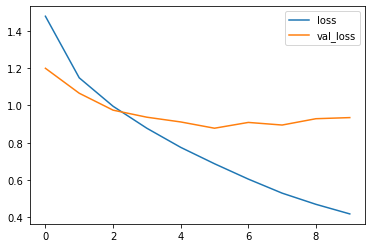

In [ ]:
# Plotting loss
plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()

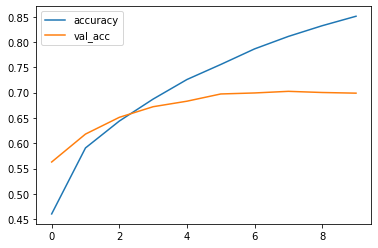

In [ ]:
# Plotting the accuracy
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[736  20  60  12  16  17   6  15  94  24]
 [ 30 777   8   8   4   5  10   3  32 123]
 [ 65   5 567  79  94  68  74  23  15  10]
 [ 26   7  64 473  66 212  85  28  14  25]
 [ 24   2  76  63 651  48  56  68  10   2]
 [ 21   2  42 180  52 613  38  40   8   4]
 [  8   7  36  45  36  29 816   7  13   3]
 [ 15   2  21  47  61  72  10 759   3  10]
 [ 57  32  16  12   9   7   6   3 830  28]
 [ 47  78   8  22  10  13   6  13  35 768]]


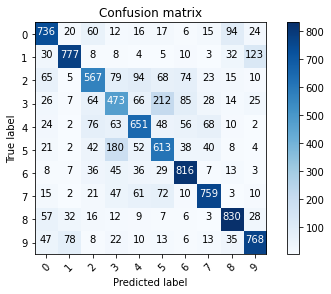

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

True label: bird Predicted: airplane


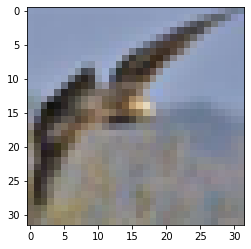

In [ ]:
# Checking misclassified images
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i],cmap='gray')
print("True label: %s Predicted: %s"%(labels[y_test[i]],labels[p_test[i]]))